# 확률분포의 추정
데이터가 어떤 확률변수로부터 실현된 표본 가정

확률변수의 분포를 알아내기 위한 작업

1. 어떤 분포를 따르는지 알아낸다.
2. 확률분포의 모수 값을 추정

데이터의 형태, 값에 따라 분포를 예상할 수 있다.
- 데이터가 0이나 1밖에 없으면 : 베르누이분포
- 데이터가 카테고리 값 : 카테고리분포
- 0과 1 사이의 실수 값 : 베타분포
- 데이터가 0또는 양수 : 감마분포, 로그정규분포, F분포 등등
- 데이터가 제한이 없는 실수 : 정규분포, T분포 등등



In [1]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)
df

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


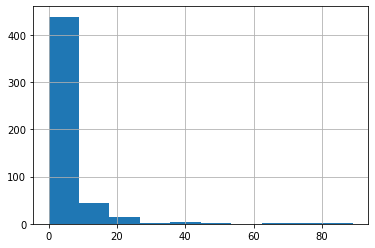

In [3]:
import matplotlib.pyplot as plt
df['CRIM'].hist()
plt.show()
# 범죄율의 분포를 한번 살펴봄

## 모수 추정 방법
어떤 모집단의 모수를 추정하는 작업
- 모멘트 방법
- 최대가능도 추정법
- 베이즈 추정법

## 모멘트 방법
표본자료에 대한 표본 모멘트가 모집단의 모멘트와 동일하다는 가정

표본 모멘트를 통해서 모수를 추정

$$μ= E[X]= \hat{x} = \frac{1}{N}\Sigma_{i=1}^N{x_i}$$

$$σ^2 = E[(X-μ)^2] = s^{-2}= \frac{1}{N-1}\Sigma_{i=1}^N(x_i$$

### 베르누이 분포의 모수 추정
$$E[X] = μ=\hat{x}=\frac{1}{N}\Sigma_{i=1}^N x_i = \frac{N_1}{N}$$


### 정규분포의 모수 추정
$$E[X] = μ=\hat{x} = \frac{1}{N}\Sigma_{i=i}^N x_i $$

$$σ^2 = E[(X-μ)^2] = s^{-2}= \frac{1}{N-1}\Sigma_{i=1}^N(x_i-\hat{x})^2$$

### 베타분포의 모수 추정
$$ E[X] = \frac{a}{a+b} = \hat{x}$$
$$ E[(X-μ)^2] = \frac{ab}{(a+b)^2(a+b+1)}=s^2$$

$$a = \hat{x} \left(\frac{\hat{x} ( 1-\hat{x})}{s^2} - 1 \right)$$
$$b = (1-\hat{x})\left(\frac{\hat{x}(1 - \hat{x})}{s^2}-1\right)$$


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


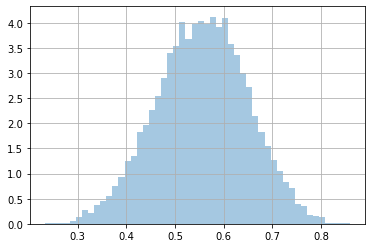

In [6]:
import scipy as sp
import scipy.stats
import numpy as np
import seaborn as sns
x = scipy.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.grid()
plt.show()

In [7]:
def estimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar*(x_bar*(1-x_bar)/s2-1)
    b = (1-x_bar)*(x_bar*(1-x_bar)/s2-1)
    return a,b
params = estimate_beta(x)
print(params)

(15.167316718132343, 12.140465742789276)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


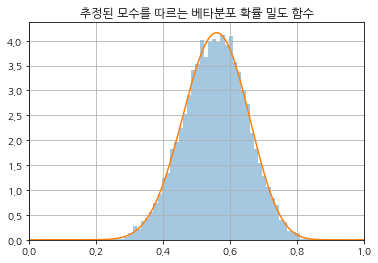

In [9]:
import koreanize_matplotlib
xx = np.linspace(0, 1, 1000)
sns.distplot(x, kde=False, norm_hist=True)
plt.plot(xx, scipy.stats.beta(params[0], params[1]).pdf(xx))
plt.xlim(0,1)
plt.title('추정된 모수를 따르는 베타분포 확률 밀도 함수')
plt.grid()
plt.show()
# 모멘트 추정을 통해 구한 추정값으로 생성된 베타 pdf를 시각화

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


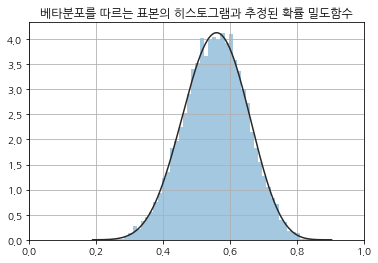

In [10]:
sns.distplot(x, kde=False, norm_hist=True, fit=scipy.stats.beta)
plt.xlim(0,1)
plt.title('베타분포를 따르는 표본의 히스토그램과 추정된 확률 밀도함수')
plt.grid()
plt.show()
# 자동으로 분포에 맞게 계산된 베타분포의 분포도